In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [ ]:
mod=Sequential()
mod.add(Dense(10,activation='relu',input_dim=8))
mod.add(Dense(2,activation='sigmoid'))

In [ ]:
mod.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
h1=mod.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test1))

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 6.2640 - accuracy: 0.3524 - val_loss: 4.1473 - val_accuracy: 0.4219
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 3.7292 - accuracy: 0.3785 - val_loss: 2.8341 - val_accuracy: 0.3802
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 3.0777 - accuracy: 0.3889 - val_loss: 2.5190 - val_accuracy: 0.4167
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 2.7471 - accuracy: 0.4340 - val_loss: 2.2459 - val_accuracy: 0.4427
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 2.4922 - accuracy: 0.4809 - val_loss: 2.0424 - val_accuracy: 0.4635
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 2.2435 - accuracy: 0.5035 - val_loss: 1.8286 - val_accuracy: 0.5208
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 1.9982 - accuracy: 0.5642 - val_loss: 1.6219 - val_accuracy: 0.5938
Epoch 8/100


In [ ]:
res=pd.DataFrame(h1.history)
res['Epochs']=range(1,101)
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
95,0.570833,0.710069,0.611192,0.687500,96
96,0.566596,0.720486,0.624186,0.687500,97
97,0.592049,0.697917,0.600321,0.671875,98
98,0.575130,0.706597,0.596107,0.697917,99
99,0.571506,0.715278,0.600130,0.677083,100


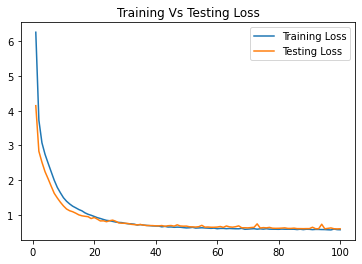

In [ ]:
plt.plot(res['Epochs'],res['loss'],label='Training Loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing Loss')
plt.title('Training Vs Testing Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=mod.predict(x_test)
y_pred[:5]

array([[0.4078676 , 0.7072828 ],
       [0.8707311 , 0.06335908],
       [0.6649427 , 0.28916734],
       [0.8198362 , 0.09307721],
       [0.28951693, 0.59955835]], dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=1)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[94 30]
 [32 36]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       124
           1       0.55      0.53      0.54        68

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.68       192

